# Data Mining - Analyse Descriptive

In [313]:
import os
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import jarque_bera
from scipy.stats import describe
from matplotlib import gridspec
from fanalysis.pca import PCA
from scipy.stats import kruskal

from scipy import stats

In [314]:
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (11,7)

In [315]:
data = pd.read_csv('data/FINAL_DATA.csv', index_col=0)
checkings = data.copy()
data.shape

(38405, 40)

On retire les espaces au début du nom de certaines variables :

In [316]:
data.columns = data.columns.str.lstrip()

## Analyse descriptive 


### Variables relatives aux articles

Nous avons déjà des variables pour différencier les jours de la semaine et différencier les weeks-end du reste de la semaine. Nous ajoutons une variable `month` pour les mois (inutile pour les années car seulement deux années différentes), puis on convertit `month`et `week` en variable catégorielle.

In [317]:
data.loc[:,'date'] = pd.to_datetime(data.loc[:,'date'])
data['month'] = data['date'].dt.month_name()
data = data.astype({'month': 'object', 'week': 'object'})

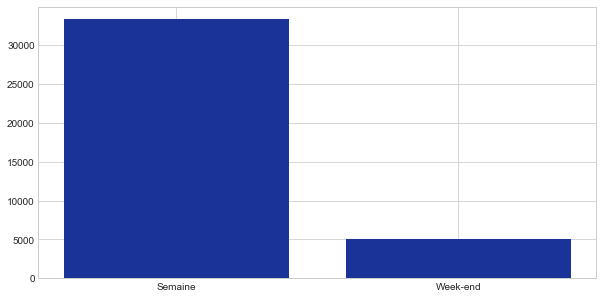

In [318]:
plt.figure(figsize=(10,5))
plt.bar(["Semaine","Week-end"],data.week.value_counts(), width=0.8, color=color_titi)
plt.xticks([0,1]);
plt.savefig('semaine_week.png')

In [357]:
data.week.value_counts() / len(data)

0    0.86783
1    0.13217
Name: week, dtype: float64

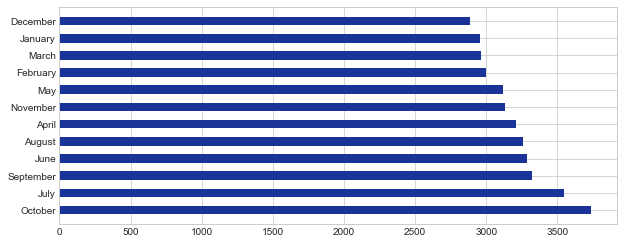

In [319]:
plt.figure(figsize=(10,4))
plt.barh(list(data.month.value_counts().index), data.month.value_counts(), height=0.5, color=color_titi)
plt.savefig('month.png');

In [358]:
data.month.value_counts() / len(data)

October      0.097253
July         0.092358
September    0.086499
June         0.085484
August       0.084833
April        0.083557
November     0.081474
May          0.081239
February     0.077985
March        0.077230
January      0.077047
December     0.075042
Name: month, dtype: float64

Pour réduire le nombre total de catégories, on remplace le nom des auteurs par `noname` quand ce dernier ne fait pas partie des 9 auteurs ayant écrit le plus d'articles. On réduit ainsi le nombre d'auteurs différents à 10 (au lieu de plus de 1100) tout en gardant l'information relative à l'auteur pour 11083 articles.

In [321]:
top_authors = data.author_name.value_counts().index[:9]
sum(data.author_name.value_counts()[:9])
data.loc[~data.author_name.isin(top_authors), 'author_name'] = 'Noname'
print(data.author_name.value_counts().to_latex())

\begin{tabular}{lr}
\toprule
{} &  author\_name \\
\midrule
Noname                        &        28148 \\
Neha Prakash                  &         1499 \\
Sam Laird                     &         1458 \\
Stan Schroeder                &         1443 \\
Todd Wasserman                &         1287 \\
Seth Fiegerman                &         1267 \\
Brian Anthony Hernandez       &         1233 \\
Samantha Murphy               &         1093 \\
Lorenzo Franceschi-Bicchierai &          977 \\
\bottomrule
\end{tabular}



On retire les variables : `url`, `content`, `lemmatized` et `date`.

In [322]:
data = data.drop(labels=['url','title','content','lemmatized','date'], axis=1)
print(data.shape)
print(data.isnull().sum().to_latex())

(38405, 36)
\begin{tabular}{lr}
\toprule
{} &  0 \\
\midrule
shares                              &  0 \\
author\_name                         &  0 \\
nb\_images                           &  0 \\
num\_videos                          &  0 \\
num\_hrefs                           &  0 \\
num\_keywords                        &  0 \\
chanel                              &  0 \\
day                                 &  0 \\
week                                &  0 \\
Topic\_nmf other                     &  0 \\
Topic\_nmf family and job            &  0 \\
Topic\_nmf web                       &  0 \\
Topic\_nmf apple                     &  0 \\
Topic\_nmf twitter                   &  0 \\
Topic\_nmf facebook                  &  0 \\
Topic\_nmf musics and videos         &  0 \\
Topic\_nmf photography               &  0 \\
Topic\_nmf business                  &  0 \\
Topic\_nmf google                    &  0 \\
dominant\_topic                      &  0 \\
Topic\_nmf devices telecomunication  &  0 \

### Variables relatives aux thèmes

Pour l'analyse des variables relatives au sentiment analysis, voir overleaf partie sentiment analysis. \
Pour ce qui est des thèmes. Le thème LDA le plus récurrent est Entertainment, le thème NMF le plus récurrent est other, juste devant Politics and society. On remarque également que les classements sont globalement cohérents entre les deux méthodes. Par exemple : sur les 4332 articles classés 'devices telecom' par l'algo NMF, 3265 le sont aussi par l'algo LDA (soit plus de 75%). En revanche, lorsque le thème LDA est trop large (par exemple Entertainment), le thème NMF permet d'obtenir une information plus précise.

In [110]:
color_titi = (0.1,0.2,0.6)

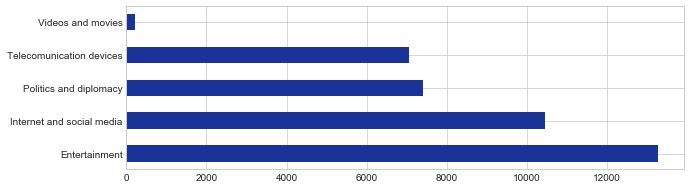

In [323]:
plt.figure(figsize=(10,3))

plt.barh(list(data.dominant_topic_lda.value_counts().index), 
        data.dominant_topic_lda.value_counts(), height=0.5, color=color_titi)
plt.savefig('lda.png')

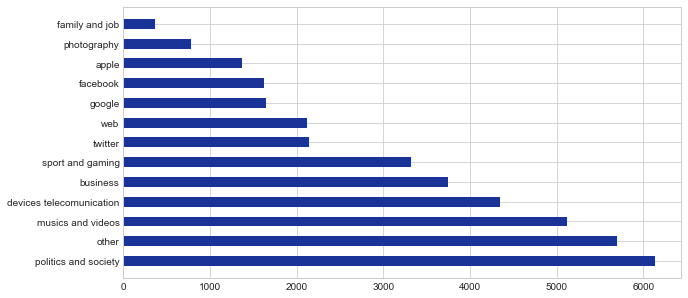

In [324]:
plt.figure(figsize=(10,5))
plt.barh(list(data.dominant_topic.value_counts().index), 
        data.dominant_topic.value_counts(), height=0.5, color=color_titi)
plt.savefig('nmf.png');

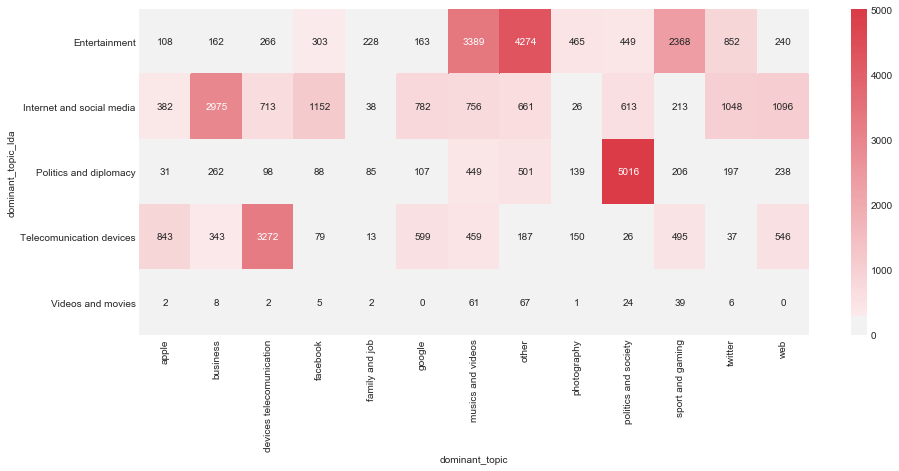

In [325]:
cross_topic = pd.crosstab(data['dominant_topic_lda'], 
                            data['dominant_topic']) 

plt.figure(figsize=(15,6))
sns.heatmap(cross_topic, cmap=cmap, annot=True, center=100, cbar=True, fmt='0g')
plt.savefig('crosstab.png');

In [215]:
first_var = data[["shares",'nb_images', 'num_videos', 'num_hrefs',
       'num_keywords']]

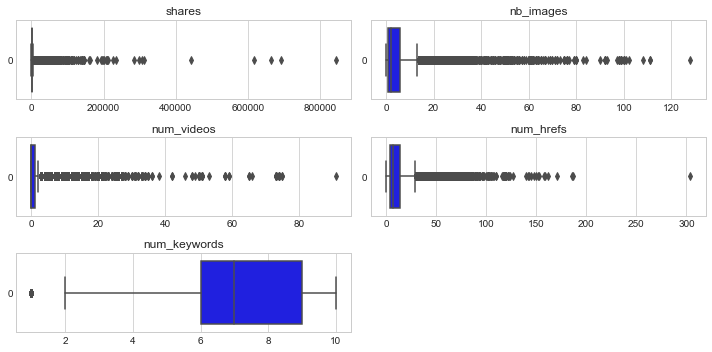

In [326]:
plt.figure(figsize=(10,5))
for i,j in enumerate(first_var) :
    plt.subplot(3,2,i+1)
    sns.boxplot(data=data[j], orient='h', color='blue')
    plt.tight_layout()
    plt.title(j)

plt.savefig('boxplot_article.png');

In [224]:
nmf = data[['Topic_nmf other',
       'Topic_nmf family and job', 'Topic_nmf web', 'Topic_nmf apple',
       'Topic_nmf twitter', 'Topic_nmf facebook',
       'Topic_nmf musics and videos', 'Topic_nmf photography',
       'Topic_nmf business', 'Topic_nmf google', 'Topic_nmf devices telecomunication', 'Topic_nmf politics and society',
       'Topic_nmf sport and gaming']]

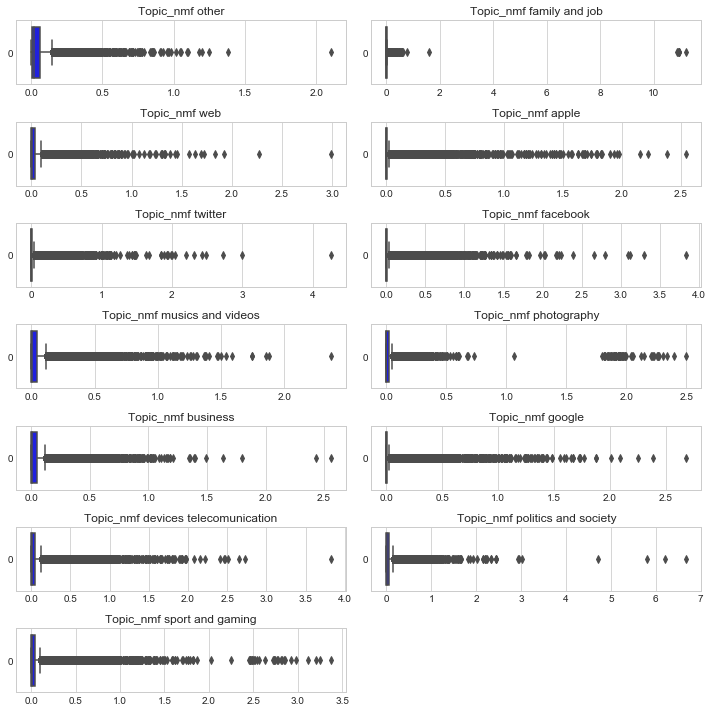

In [327]:
plt.figure(figsize=(10,10))
for i,j in enumerate(nmf) :
    plt.subplot(7,2,i+1)
    sns.boxplot(data=data[j], orient='h', color='blue')
    plt.title(j)
    plt.tight_layout()

plt.savefig('boxplotnmf.png');

In [232]:
lda = data[['Topic_lda Politics and diplomacy',
       'Topic_lda Internet and social media', 'Topic_lda Videos and movies',
       'Topic_lda Telecomunication devices', 'Topic_lda Entertainment']]

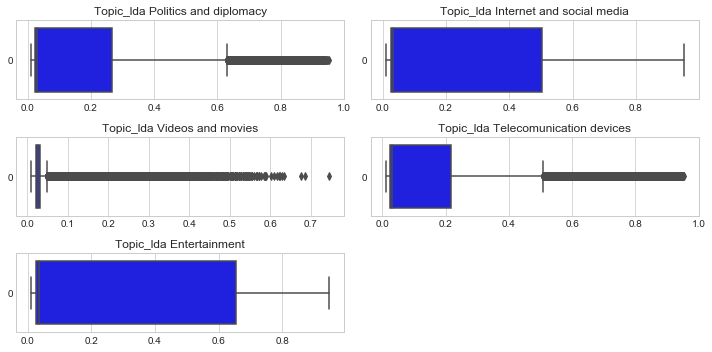

In [328]:
plt.figure(figsize=(10,5))
for i,j in enumerate(lda) :
    plt.subplot(3,2,i+1)
    sns.boxplot(data=data[j], orient='h', color='blue')
    plt.title(j)
    plt.tight_layout()
plt.savefig('boxplotlda.png')

### Analyse globale des corrélations

Pour ce qui est de l'analyse des corrélations, on remarque que aucune corrélation (linéaire ou non) ne dépasse le seuil de 0.6 en valeur absolue, si ce n'est pour les variables relative à l'analyse de sentiment lorsqu'elles sont présentes à la fois en valeur et en valeur absolue (ce qui est logique).

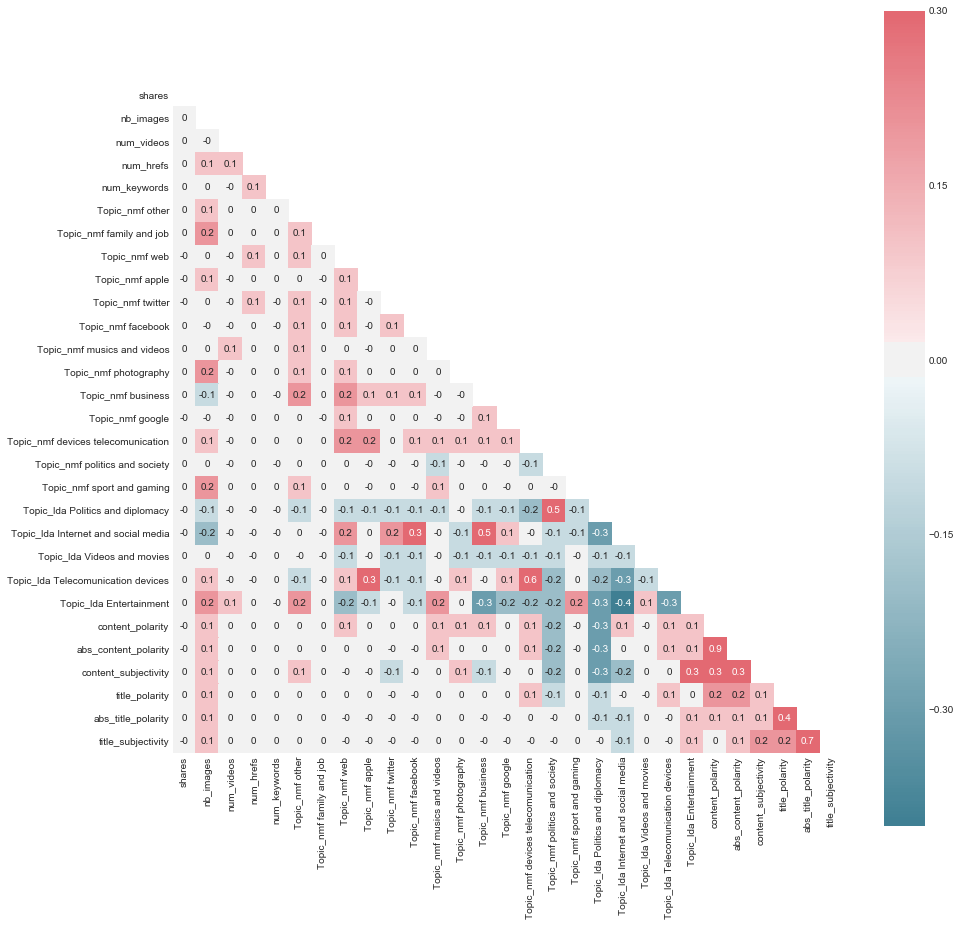

In [330]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

corrMatrix = data.select_dtypes(exclude='object').corr(method='pearson').round(decimals=1)
mask = np.triu(np.ones_like(corrMatrix, dtype=np.bool))

sns.heatmap(corrMatrix, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, annot=True)
#plt.rcParams['figure.figsize'] = (15,15)

plt.savefig('corr.png')

### Description de la variable cible

In [75]:

def stats_histo(data,name, ratio=2):
    """
    Affiche la distributions et les statistiques descriptives.
    """
    from scipy.stats import jarque_bera
    from scipy.stats import describe
    from matplotlib import gridspec
    
    
    jbv, jbp = np.round(jarque_bera(data[name]),3)
    obs, minmax, mean, var, skew, kuro = describe(data[name])

    std = np.round(np.sqrt(var),3)
    skew = np.round(skew,3)
    kuro = np.round(kuro,3)
    mean = np.round(mean,3)
    minmax = np.round(minmax,3)

    fig = plt.figure(figsize=(10, 4)) 
    gs = gridspec.GridSpec(1, 2, width_ratios=[ratio, 1]) 
    ax0 = plt.subplot(gs[0])
    ax0.hist(data[name],bins=26, linestyle = 'solid', edgecolor ="#c0c0c0", color="#6e8fd0");
    ax1 = plt.subplot(gs[1])
    ax1.plot()
    ax1.axes.get_xaxis().set_visible(False)
    ax1.axes.get_yaxis().set_visible(False)
    ax1.annotate("Série : {}".format(data[name].name,),[0.01,0.97],size='x-large',family='serif')
    ax1.annotate("Observations : {}".format(obs),[0.01,0.87],size='x-large',family='serif')
    ax1.axhline(y=.80, xmin=0.80, xmax=0.20, c='black', lw=0.7)
    ax1.annotate("Moyenne : {}".format(mean),[0.01,0.70],size='x-large',family='serif')
    ax1.annotate("Max : {}".format(minmax[0]),[0.01,0.60],size='x-large',family='serif')
    ax1.annotate("Min : {}".format(minmax[1]),[0.01,0.50], size='x-large', family='serif')
    ax1.annotate("Std. Dev : {}".format(std),[0.01,0.40],size='x-large',family='serif')
    ax1.annotate("Skewness : {}".format(skew),[0.01,0.30],size='x-large',family='serif')
    ax1.annotate("Kurtosis : {}".format(kuro),[0.01,0.20], size='x-large', family='serif')
    ax1.annotate("Jarque-Bera : {}".format(jbv),[0.01,0.10],size='x-large',family='serif')
    ax1.annotate("P-valeur : {}".format(jbp),[0.01,0.00], size='x-large', family='serif')
    plt.tight_layout()

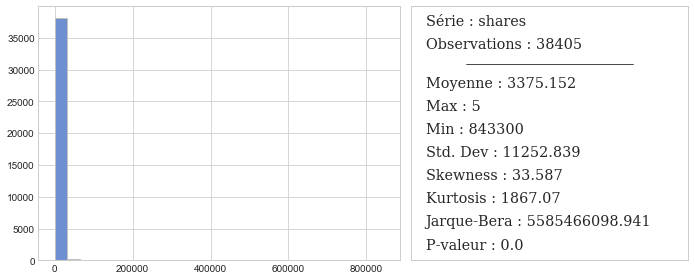

In [331]:
stats_histo(data,'shares', ratio=1.3)
plt.savefig('share.png')

On observe une distribution avec un skewness bien supérieur à 0. 80% des articles ont un nombre de partages inférieur à la moyenne. On passe au logarithme naturel pour avoir une distribution plus lisse et moins asymétrique.

In [333]:
data["log_shares"] = np.log(data['shares'])

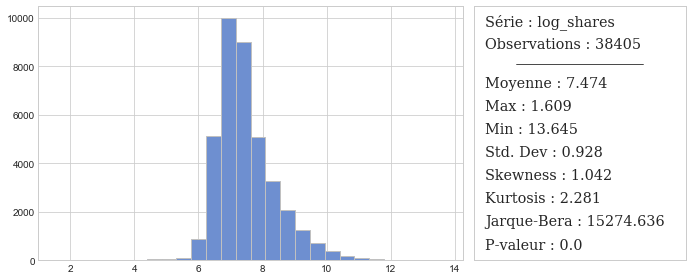

In [334]:
stats_histo(data,"log_shares")
plt.savefig('log_shares.png')

### Lien entre la cible et les variables quantitatives

On mesure le lien entre la cible et les variables quantitatives à l'aide des coefficients de corrélation de Pearson et Spearman.

In [340]:
pearson_corr = dict.fromkeys(data.select_dtypes(exclude='object').columns)
for key in pearson_corr.keys() :
    corr = abs(stats.pearsonr(data['shares'],data[key])[0])
    pearson_corr[key] = corr
del pearson_corr['shares']
del pearson_corr['log_shares']
pearson_corr = {k: v for k, v in sorted(pearson_corr.items(), key=lambda item: item[1])}

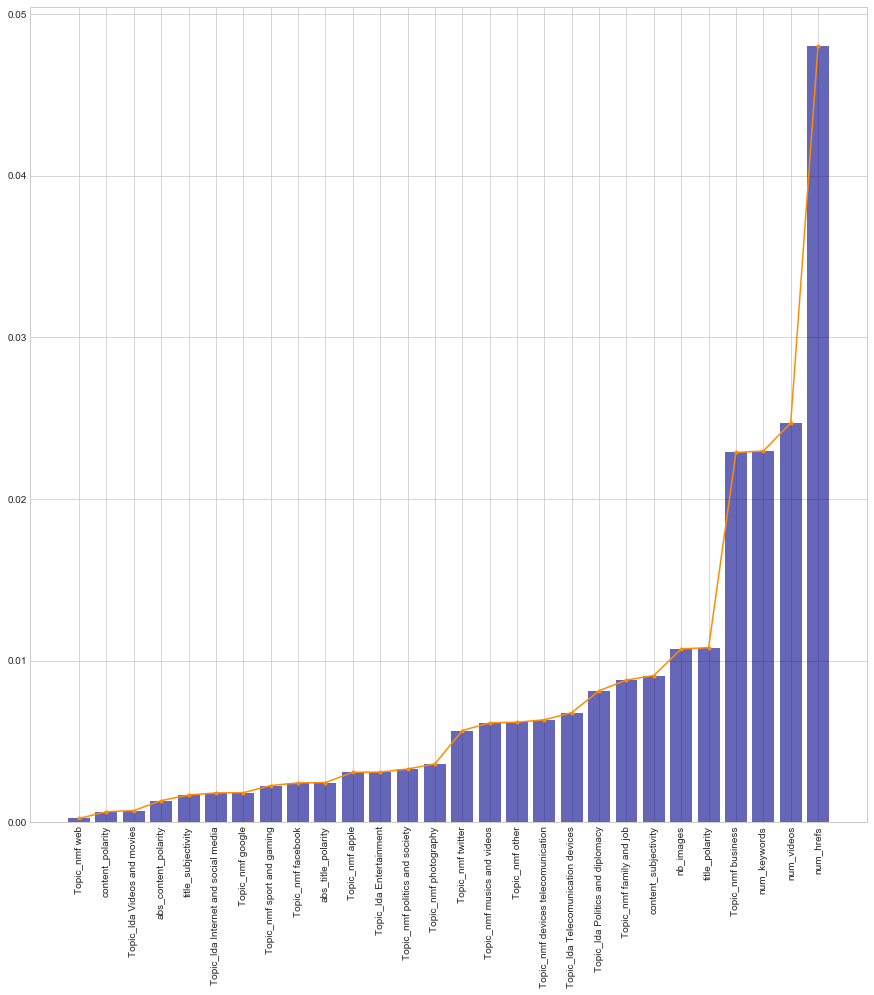

In [341]:
plt.bar(range(len(pearson_corr)), list(pearson_corr.values()), 
        align='center', color = 'darkblue', alpha= 0.6)


plt.plot([i-1 for i in range(1,29)], list(pearson_corr.values()),
                  linestyle='-', marker='.', color = 'darkorange')

plt.xticks(range(len(pearson_corr)), list(pearson_corr.keys()), rotation = 90)

plt.savefig('link_quanti.png')

Quelle que soit la mesure de corrélation retenue, on peut observe un "coude" au-delà de la valeur 0.02 (ce qui est très faible).

### Lien entre la cible et les variables qualitatives

Pour les variables qualitatives, nous testons leur liens avec la variable shares. Les variables sont les suivantes : Nom, jour de la semaine, week-end, dominant topic LDA et NMF, mois.

In [239]:
quali = data[['author_name','chanel','day','week',"dominant_topic", "dominant_topic_lda",'month']]

In [298]:
list_kruskal = []
list_pval = []

for variable in list(quali.columns) :
    
    liste_var = []
    
    for i in list(np.unique(data[variable])):
        col = data[["shares",variable]][data[variable] == i]
        liste_var.append(col.shares)
    
    list_kruskal.append(kruskal(*liste_var).statistic)
    list_pval.append(kruskal(*liste_var).pvalue)
    
    list_var = []

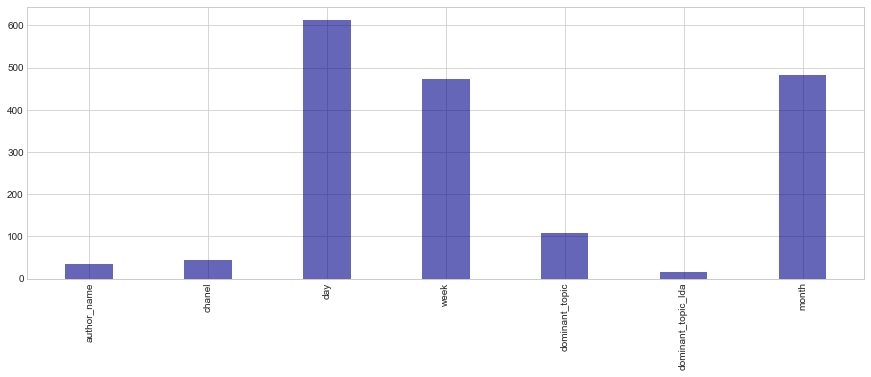

In [342]:
plt.figure(figsize=(15,5))

plt.bar(range(len(list_kruskal)), list(list_kruskal), 
        align='center', color = 'darkblue', alpha = 0.6, width=0.4)

plt.xticks(range(len(list_kruskal)), list(quali.columns), rotation = 90);
plt.savefig('link_quali.png')

On mesure le lien entre ien entre la cible et les variables qualitatives à l'aide du test de Kruskall-Wallis et de la statistique de test associée. Pour rappel, une valeur élevée de la statistique indique qu’il existe une forte liaison entre la variable qualitative et la variable cible. \
Lien pour faire la boucle : https://stackoverflow.com/questions/40052290/loop-for-pandas-columns

## Analyse exploratoire de l'ensemble des variables

In [303]:
quanti = data[['shares', 'nb_images', 'num_videos', 'num_hrefs',
       'num_keywords','Topic_nmf other',
       'Topic_nmf family and job', 'Topic_nmf web', 'Topic_nmf apple',
       'Topic_nmf twitter', 'Topic_nmf facebook',
       'Topic_nmf musics and videos', 'Topic_nmf photography',
       'Topic_nmf business', 'Topic_nmf google','Topic_nmf devices telecomunication', 
               'Topic_nmf politics and society',
       'Topic_nmf sport and gaming', 'Topic_lda Politics and diplomacy',
       'Topic_lda Internet and social media', 'Topic_lda Videos and movies',
       'Topic_lda Telecomunication devices', 'Topic_lda Entertainment','content_polarity', 
               'abs_content_polarity',
       'content_subjectivity', 'title_polarity', 'abs_title_polarity',
       'title_subjectivity']]

In [308]:
my_pca = PCA(std_unit=True, 
             row_labels=list(quanti.index), 
             col_labels=list(quanti.columns))

my_pca.fit(quanti.to_numpy())

PCA(col_labels=['shares', 'nb_images', 'num_videos', 'num_hrefs',
                'num_keywords', 'Topic_nmf other', 'Topic_nmf family and job',
                'Topic_nmf web', 'Topic_nmf apple', 'Topic_nmf twitter',
                'Topic_nmf facebook', 'Topic_nmf musics and videos',
                'Topic_nmf photography', 'Topic_nmf business',
                'Topic_nmf google', 'Topic_nmf devices telecomunication',
                'Topic_nmf politics and society', 'Topic_n...
                'Topic_lda Videos and movies',
                'Topic_lda Telecomunication devices', 'Topic_lda Entertainment',
                'content_polarity', 'abs_content_polarity',
                'content_subjectivity', 'title_polarity', 'abs_title_polarity',
                'title_subjectivity'],
    n_components=None,
    row_labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, ...],
    stats=True, std_unit=True)

In [354]:
plt.rcParams['figure.figsize'] = (10,10)

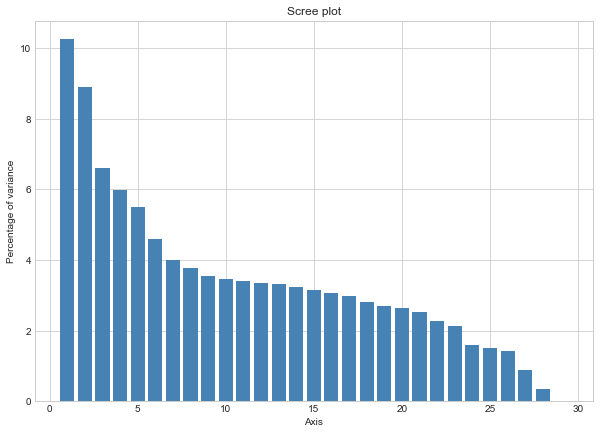

In [351]:
my_pca.plot_eigenvalues(type="percentage")

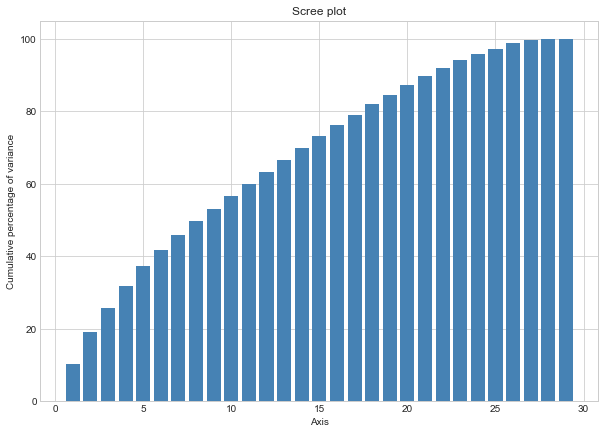

In [352]:
my_pca.plot_eigenvalues(type="cumulative")

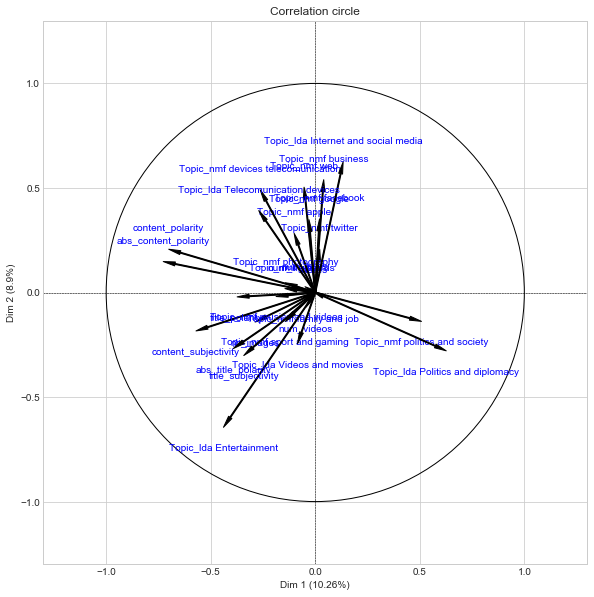

In [355]:
my_pca.correlation_circle(num_x_axis=1, num_y_axis=2)

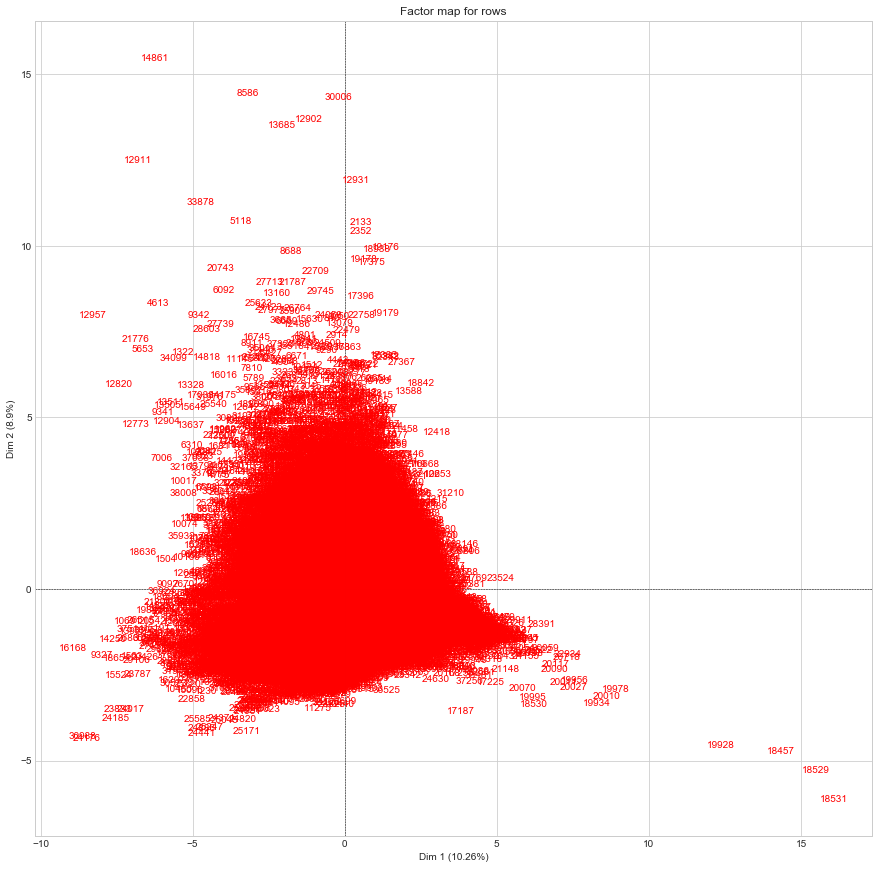

In [312]:
**time

my_pca.mapping_row(num_x_axis=1, num_y_axis=2, figsize=(15,15))